# Curve Fitting - gradient descent

In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#fitting arbitrary functions

# Example /from the lectures/

In [3]:
def f1(theta,x):
 
    return(theta[0]/((x-theta[1])**2+1.0))

# Def the gradient 
def f_grad1(theta,x):
  
    return(np.array([
        1./((x-theta[1])**2+1.0)
    ,
        2*(x-theta[1])*theta[0]/((x-theta[1])**2+1.0)
    ]
    ))

# actual function
def true_f1(x):
    return( 3.0/((x-0.5)**2+1.0) )

# random samples
def samples1(nsamples,width=2.0):
    return(width*np.random.randn(nsamples))


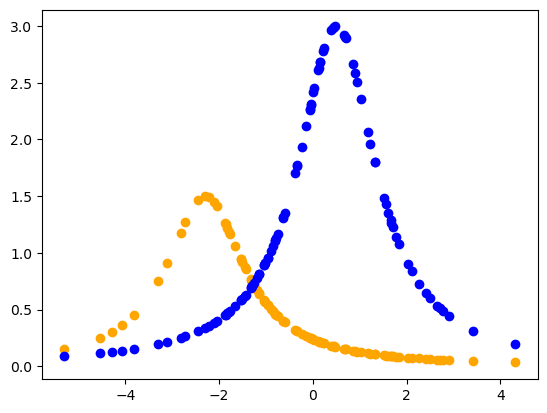

In [4]:
# take arbitrary parameters as starting point
theta=np.array([1.5,-2.3])           

x=samples1(100)
plt.scatter(x,f1(theta,x),color="orange")
plt.scatter(x,true_f1(x),color="blue")
plt.show()
#comparisson

#  Random nonlinear function and gamma function

In [5]:
print(np.random.gamma(1,1,50))

[0.57432134 0.23241755 0.36665389 1.10903241 1.18556652 0.30977496
 2.31382173 0.41633307 0.12741943 1.98191544 0.39140228 4.69749593
 0.1926485  0.40392279 0.17327695 0.88990189 2.13793493 0.04179797
 2.41289795 0.65075379 1.73734047 1.15409461 1.1274081  0.57933496
 0.75462803 1.17132145 0.56975054 0.70106309 1.53183586 0.84419582
 0.1894229  3.97716814 1.39534971 0.54742077 0.46028634 0.99603138
 1.88862153 1.09717827 0.32488081 1.34052735 0.00617573 2.87511588
 0.65328254 0.42305684 0.22532991 0.72183289 0.1477478  0.75819246
 1.46202903 1.1459075 ]


In [6]:
def f2(theta,x):
    
    return(theta[1]/((x-theta[0])**3+7.0))

def f_grad2(theta,x):
    
    return(np.array([
        1./((x-theta[0])**3+7.0)
    ,
        2*(x-theta[0])*theta[1]/((x-theta[1])**3+7.0)
    ]
    ))

def true_f2(x):
    return( 0.01/((x-5.0)**2+7.0) )


def samples2(nsamples,width=1):
    return(width*np.random.gamma(1,1,300))


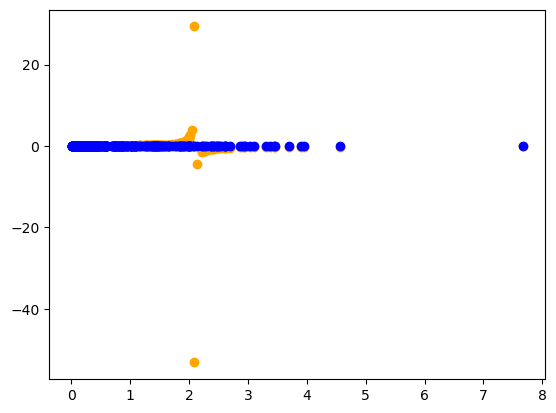

In [7]:
theta=np.array([4,-2])           

x=samples2(300)
plt.scatter(x,f2(theta,x),color="orange")
plt.scatter(x,true_f2(x),color="blue")
plt.show()

# Homework - sin_function

In [8]:
def f3(theta, x):
    return np.sin(theta[1]*(x-theta[0]))/(10.0+x**2)

def f_grad3(theta, x):
    
    return np.array([((x-theta[1])*cos(theta[0]*(x-theta[1]))/(10+x**2))
                    ,((-theta[0]*(cos(theta[0]*(x-theta[1]))))/(10+x**2))])
    
def true_f3(x):
    return np.sin(3.0*(x-1.5))/(10.0+x**2)

def samples3(nsamples,width=2.0):
    return(width*np.random.randn(nsamples))

<function matplotlib.pyplot.show(close=None, block=None)>

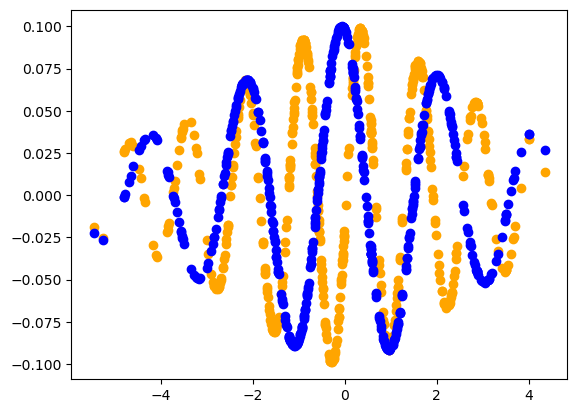

In [9]:
theta=np.array([-5,5])
x=samples3(500)

plt.scatter(x, f3(theta,x), color="orange")
plt.scatter(x, true_f3(x), color="blue")
plt.show

# Evaluating cost function /evaluate deviation/

In [10]:
#first function

In [11]:
def cost_f(theta0, theta1, nsamples):         #theta0 & theta1 are samples, generated with linspace
    
    n0=len(theta0)
    n1=len(theta1)
    cost=np.zeros([n0,n1])     #constructing the cost_f array
    for i in range(n0):
        for j in range(n1):
            theta=np.array([theta0[i],theta1[j]])
            x=samples1(nsamples)
            cost[i,j]=0.5*np.average((f1(theta,x)-true_f1(x))**2)   #the cost function, calculated for every 
    return(cost)

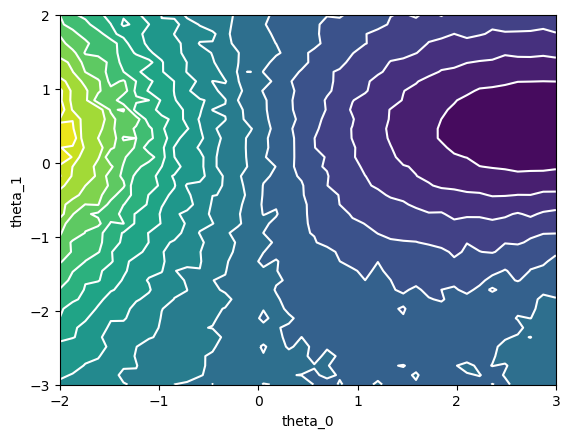

In [12]:
theta0=np.linspace(-2,3,40)
theta1=np.linspace(-3,2,40)
c=cost_f(theta0, theta1, 1500)

X,Y=np.meshgrid(theta0,theta1,indexing='ij')
plt.contourf(X,Y,c,20)
plt.contour(X,Y,c,20,colors="white")
#Plot contour lines
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.show()

In [13]:
#second function

In [14]:
def cost_f(theta0, theta1, nsamples):         #theta0 & theta1 are samples, generated with linspace
    
    n0=len(theta0)
    n1=len(theta1)
    cost=np.zeros([n0,n1])     #constructing the cost_f array
    for i in range(n0):
        for j in range(n1):
            theta=np.array([theta0[i],theta1[j]])
            x=samples2(nsamples)
            cost[i,j]=0.5*np.average((f2(theta,x)-true_f2(x))**2)   #the cost function, calculated for every 
    return(cost)

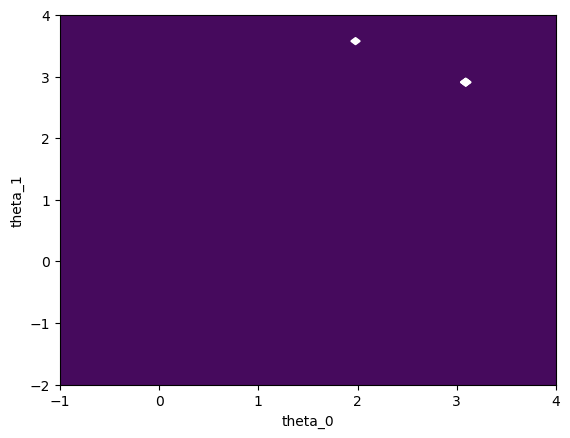

In [15]:
theta0=np.linspace(-1,4,100)
theta1=np.linspace(-2,4,100)
c=cost_f(theta0, theta1, 1500)

X,Y=np.meshgrid(theta0,theta1,indexing='ij')
plt.contourf(X,Y,c,20)
plt.contour(X,Y,c,20,colors="white")
#Plot contour lines
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.show()

In [16]:
#third function

In [26]:
def cost_f(theta0, theta1, nsamples):  
    
    n0=len(theta0)
    n1=len(theta1)
    cost=np.zeros([n0,n1])   
    for i in range(n0):
        for j in range(n1):
            theta=np.array([theta0[i],theta1[j]])
            x=samples3(nsamples)
            cost[i,j]=0.5*np.average((f3(theta,x)-true_f3(x))**2)   
    return(cost)

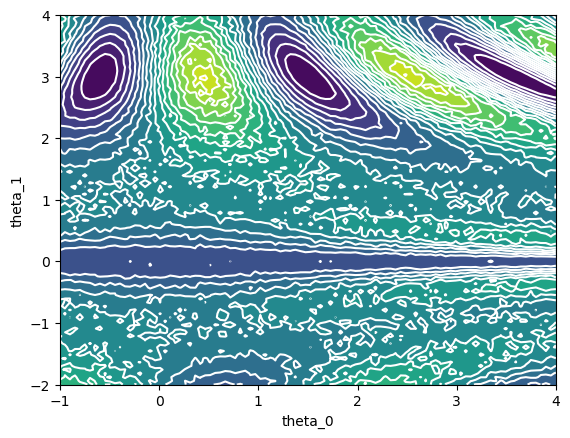

In [27]:
theta0=np.linspace(-1,4,100)
theta1=np.linspace(-2,4,100)
c=cost_f(theta0, theta1, 1500)

X,Y=np.meshgrid(theta0,theta1,indexing='ij')
plt.contourf(X,Y,c,20)
plt.contour(X,Y,c,20,colors="white")
#Plot contour lines
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.show()

# Gradient descent implementation

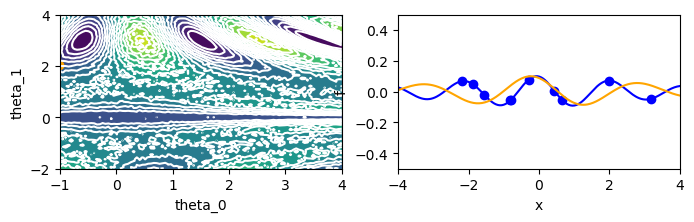

In [28]:
from IPython.display import clear_output
from time import sleep

theta=np.array([-1.0,2.0])

#gradient descent
eta=.2 # "learning rate" (gradient descent step size)
nsamples=10 # stochastic x samples used per step
nsteps=100 # how many steps we take

x_sweep=np.linspace(-4,4,300)

for n in range(nsteps):
    x=samples3(nsamples)
    deviation=f3(theta,x)-true_f3(x)
    theta-=eta*np.average(deviation[None,:]*f_grad3(theta,x),axis=1)
    
    clear_output(wait=True)
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(8,2))
    
    nlevels=20
    ax[0].contourf(X,Y,c,nlevels)
    ax[0].contour(X,Y,c,nlevels,colors="white")
    ax[0].scatter([theta[0]],[theta[1]],color="orange")
    ax[0].set_xlim(theta0[0],theta0[-1])
    ax[0].set_ylim(theta1[0],theta1[-1])
    ax[0].set_xlabel("theta_0")
    ax[0].set_ylabel("theta_1")    
    
    ax[1].plot(x_sweep,true_f3(x_sweep),color="blue")
    ax[1].scatter(x,true_f3(x),color="blue")
    ax[1].plot(x_sweep,f3(theta,x_sweep),color="orange")
    ax[1].set_xlim(-4,4)
    ax[1].set_ylim(-0.5,0.5)
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("f") 
    
    plt.show()
    sleep(0.3)